# Spam Classification

**Team Member:** **Yucheol-Shin**, **Ricco Ferraro**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Modeling-Preparations" data-toc-modified-id="Modeling-Preparations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling Preparations</a></span><ul class="toc-item"><li><span><a href="#Proposed-Methods" data-toc-modified-id="Proposed-Methods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Proposed Methods</a></span></li><li><span><a href="#Evaluation-Method-Discussion" data-toc-modified-id="Evaluation-Method-Discussion-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Evaluation Method Discussion</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Precision-and-Recall" data-toc-modified-id="Precision-and-Recall-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Precision and Recall</a></span></li><li><span><a href="#F-1-Score" data-toc-modified-id="F-1-Score-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>F-1 Score</a></span></li><li><span><a href="#ROC-Curve-and-AUC" data-toc-modified-id="ROC-Curve-and-AUC-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>ROC Curve and AUC</a></span></li></ul></li></ul></li><li><span><a href="#Data-Engineering" data-toc-modified-id="Data-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Engineering</a></span><ul class="toc-item"><li><span><a href="#Data-Structure" data-toc-modified-id="Data-Structure-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Structure</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>TFIDF</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Doc2Vec</a></span></li></ul></li><li><span><a href="#Model-Building-&amp;-Evaluation" data-toc-modified-id="Model-Building-&amp;-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Building &amp; Evaluation</a></span><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Naive-Bayes-Model" data-toc-modified-id="Naive-Bayes-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Naive Bayes Model</a></span></li><li><span><a href="#Model-Performance-Evaluation" data-toc-modified-id="Model-Performance-Evaluation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model Performance Evaluation</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Business Understanding:
The goal of this study is to build a SPAM classification model which is able to take raw, unstructured email text and classify whether they are either:
    A. SPAM (labeled 1)
 – or –
    B. NOT spam (HAM, labeled 0)
    
For this study, we define 'spam' as any unwanted and/or unsolicited email. Spam can be of commercial purpose, fraudulent, or even a phishing attempt. Clustering and classification methods are widely used nowadays to filter out spam email. In this study we will leverage both clustering and classification to do exactly that. 

It should be noted that no spam filter is perfect, and invariably, some valid emails will be marked as spam, and some spam emails will be classified as not spam. It is important to note that maximizing precision is important in this study. That is, reducing the numnber of false positives (valid emails being labled incorrectly as SPAM). This is because the downside or end user risk associated with labeling valid emails (HAM) incorrectly as SPAM is that a user will miss valid emails. This generally outweighs the cons of allowing spam to be stay in a user's email inbox (a slight annoyance to the user).


## Modeling Preparations

#### Proposed Methods
After preprocessing and feature engineering, we use a Multinomial Naive Bayes classification model method to classify spam. Multinomial Naive Bayes classification is a probablistic supervised machine learning algorithm based on the Bayes Rule. It is especially used in natural language processing such as categorizing news articles into topics, filtering spam mails, and sentiment analysis. One benefit of Naive Bayes is that it is fast to train. Given the fact that email data can be large in nature, an efficient and fast algorithm is preferrable. 

Further, clustering techniques including kmeans and  or dbscan are leveraged to visually detect seperation in our feature set, between `"spam"` and `"not spam"`.


#### Test/Train split
In order to evaluate the quality of this binary classification problem, we choose a randomized 80%/20% train/test split where 80% of the data is used for training and 5 fold cross validation, and the remaining 20% of our email data is held out to evaluate test accuracy, test precision, test recall. By keeping a holdout set, and being careful not to allow any of that holdout 'test' set to leak into our model, including feature engineering, we can be more confident in the test metrics such as Precision, Recall, or Test ROC AUC. 

#### Evaluation Method
Because our case study is a binary classification problem, spam or not spam, we can visualize the outcome of a binary classification model using a confusion matrix to generate metrics like precision, recall (where test precision is considered more important than recall).

Because we know that our dataset is unbalanced in terms of spam vs not spam (ham), where there are roughly 3x more "not spam" emails, we choose ROC Area under the curve as a scoring technique to train a Naive Bayes model. This technique better facilitates thresholding (picking the optimum cutoff probabilities to classify as "spam" or "not spam") so that an optimal value of precision and recall can be chosen. 

One tradeoff, by choosing to optimize for ROC AUC, is that predicive accuracy may decrease slightly. This is okay, in our case, because we have an imbalanced dataset and optimizing for predictive accuracy, may end up favoring the more common label of "NOT SPAM". Taken to the extreme, a model which optimizes for accuracy could just be a naive "everything is NOT SPAM" model. 


While in this study we consider prediction recall (labeling actual spam as spam), an emphasis is placed on minimizing occurences of false positives (valid emails labled incorrectly as SPAM). This is accomplished by maximizing test precision. 


For more information on ROC curves, accuracy, precision, recall, etc, please see [here](https://www.baeldung.com/cs/classification-model-evaluation)


## Data Engineering

In this case, the raw email text data we get is not "structured". Instead, we only have a bunch of email text files with no columns or rows yet. 

Firstly, we transform the unstructured text from the emails into the structured data needed for modeling. 

Note: Since we create our own structured data with this feature engineering, there is NO missing data. 

One Assumption we are making about this email data is that it is primarilly in the language of Western English. 

Another assumption we are making is that our dataset is a good and consitently distributed representation of the average email users of our spam filter receive in their inboxes. 

In [1]:
# imports 
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import spacy
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
#change directory folder
# Chris' path
curPath = os.getcwd().replace("\\", "/")
os.chdir(curPath+"/data")

# Ricco's Path
# os.chdir("/Users/riccoferraro/Documents/SMU/QTW/QTW/SpamAssassinMessages")

### Features:

Because the data we have is unstructured, custom feature extraction is required to build a structured dataset with features that can be used in modeling. The following features were added:

**is_spam:**

   A categorical and boolean `is_spam` feature is added based on the parent directory that the email text file is stored in. For files stored in directories containing the text label "spam", `is_spam` is set to true. Otherwise it is set to false. This will serve as our label and is only available in a training set. We will not have access to this when making real predictions.

**in_reply:**
    A categorical feature, this is set to true if the subject line of the email contains the text `"re:"` otherwise it is set to false. Analysis further below highlights its association with SPAM. 

**subj_caps:**
    A categorical feature, this is set to true if the subject line is in all capitalized letters. Otherwise, it is set to false. Analysis further below highlights its association with SPAM. 

**attachments:**
    A categorical feature, this is set to true if the text `<HTML>` appears in the email. Otherwise, it is set to false. Analysis further below highlights its association with SPAM. 

**body_lines:**
    A numerical feature, this is set to the number of new lines in each email. Analysis further below highlights its association with SPAM. 
    
**closing_html_count:**
    A numerical feature, this is set to the total number of occurences a given email has of the `/>` html closing tag syntax. This is roughly correlated to the number of html tags in a given email. Analysis further below highlights its association with SPAM.
    
**free_word_count:**
    A numerical feature, this is set to the total number of occurences a given email has of the text `'free'`, case insensitive. Analysis further below highlights its association with SPAM.     
    
**subscribe_word_count:**
    A numerical feature, this is set to the total number of occurences a given email has of the text `'subscribe'`, case insensitive. Note this also includes the text `unsubscribe`. Analysis further below highlights its association with SPAM.     
    
**viagra_or_cialis_word_count:**
    A numerical feature, this is set to the total number of occurences a given email has of the text `'viagra'` or the text `'cialis'`, case insensitive. Analysis further below highlights its association with SPAM.     

**doc2vec_1,2,3,4,5**
    Based on the text content for each email, document vector features are added using distributed continuous bag of words (DBOW) vectorization. These vectors represent document similarity embeddings. This technique uses both word vectorization and document vectorization. More details on how we leveraged this technique further below.
    
**contents**
    Note: the email text contents are placed in their raw form here. They are primarily used later for generating the dov2vec vector features and are not directly used in any of our models. 

Exploratory Data analysis can be seen for each of the above features, further below.

In [4]:
def read_files():

    directories = ['easy_ham',
        'easy_ham_2',
        'hard_ham',
        'spam',
        'spam_2']
    res_frame = pd.DataFrame()

    for directory in directories:
        mypath = Path.cwd()/directory
        onlyfiles = [f for f in listdir(mypath) if isfile(join(str(mypath), f)) and f !="cmds"]
        onlyfiles = [i for i in onlyfiles if i !="cmds"]

        for file in onlyfiles:
            with open(mypath/file,encoding='latin1') as f:
                lines = f.readlines()
                f.close()
                
            in_reply_count = 0
            sub_line_all_caps = 0
            attachments = 0
            subject_line = []
            n_lines = 0
            blank_lines = []
            contents = ''
            html_count = 0
            closing_html_count = 0
            free_word_count = 0
            subscribe_word_count = 0
            viagra_or_cialis_word_count = 0
            
            for line in lines:
                lower_line = line.lower()
                n_lines += 1
                if "Subject: Re: " in line:
                    in_reply_count += 1
                if "<HTML>" in line:
                    html_count +=1
                if "Subject: " in line:
                    s_line = line.strip().replace('Subject: ','')
                    s_line = ''.join(e for e in s_line if e.isalnum())
                    num_upper = sum(1 for c in s_line if c.isupper())
                    ttl_chars = len(s_line)
                    if num_upper == ttl_chars:
                        sub_line_all_caps += 1
                        subject_line.append(s_line)
                if "content-type: multipart" in line.lower():
                    attachments += 1
                if line == "\n":
                    blank_lines.append(n_lines)
                if "/>" in line:
                    closing_html_count += line.count('/>')
                if "free" in lower_line:
                    free_word_count += lower_line.count('free')
                if "subscribe" in lower_line:
                        subscribe_word_count += lower_line.count('subscribe')
                if "viagra" in lower_line:
                    viagra_or_cialis_word_count += lower_line.count('viagra')
                if "cialis" in lower_line:
                    viagra_or_cialis_word_count += lower_line.count('cialis')
                contents += str(line)

            temp_frame = pd.DataFrame({
                    'filename':file,
                    'is_spam':['Y' if 'spam' in directory else 'N'],
                    'in_reply': ['Y' if in_reply_count > 0 else 'N'], 
                    'subj_caps': ['Y' if sub_line_all_caps > 0 else 'N'], 
                    'attachments': ['Y' if attachments > 0 else 'N'], 
                    'has_html' : ['Y' if html_count > 0 else 'N'],
                    'body_lines': n_lines - min(blank_lines),
                    'closing_html_count': closing_html_count,
                    'contents': contents,
                    'free_word_count': free_word_count,
                    'subscribe_word_count': subscribe_word_count,
                    'viagra_or_cialis_word_count': viagra_or_cialis_word_count
                        }, index=[0])
            res_frame = res_frame.append(temp_frame, ignore_index=True)   
    res_frame.to_csv('output_file.csv', index=False)
    
    return res_frame
   

In [5]:
df = read_files();
df.head()

filename is_spam in_reply subj_caps  \
0  00001.7c53336b37003a9286aba55d2945844c       N        Y         N   
1  00002.9c4069e25e1ef370c078db7ee85ff9ac       N        N         N   
2  00003.860e3c3cee1b42ead714c5c874fe25f7       N        N         N   
3  00004.864220c5b6930b209cc287c361c99af1       N        N         N   
4  00005.bf27cdeaf0b8c4647ecd61b1d09da613       N        Y         N   

  attachments has_html  body_lines  closing_html_count  \
0           N        N          50                   1   
1           N        N          26                   0   
2           N        N          38                   0   
3           N        N          32                   1   
4           N        N          31                   0   

                                            contents  free_word_count  \
0  From exmh-workers-admin@redhat.com  Thu Aug 22...                0   
1  From Steve_Burt@cursor-system.com  Thu Aug 22 ...                1   
2  From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...                1   
3  From irregulars-admin@tb.tf  Thu Aug 22 14:23:...                0   
4  From Stewart.Smith@ee.ed.ac.uk  Thu Aug 22 14:...                1   

   subscribe_word_count  viagra_or_cialis_word_count  
0                     4                            0  
1                     4                            0  
2                     4                            0  
3                     4                            0  
4                     4                            0

In [6]:
df.describe(include = "all")

filename is_spam in_reply subj_caps  \
count                                     9348    9348     9348      9348   
unique                                    9348       2        2         2   
top     00001.7c53336b37003a9286aba55d2945844c       N        N         N   
freq                                         1    6951     6214      9188   
mean                                       NaN     NaN      NaN       NaN   
std                                        NaN     NaN      NaN       NaN   
min                                        NaN     NaN      NaN       NaN   
25%                                        NaN     NaN      NaN       NaN   
50%                                        NaN     NaN      NaN       NaN   
75%                                        NaN     NaN      NaN       NaN   
max                                        NaN     NaN      NaN       NaN   

       attachments has_html   body_lines  closing_html_count  \
count         9348     9348  9348.000000         9348.000000   
unique           2        2          NaN                 NaN   
top              N        N          NaN                 NaN   
freq          8594     8851          NaN                 NaN   
mean           NaN      NaN    79.983312            0.847347   
std            NaN      NaN   192.309279            4.970537   
min            NaN      NaN     2.000000            0.000000   
25%            NaN      NaN    20.000000            0.000000   
50%            NaN      NaN    33.000000            0.000000   
75%            NaN      NaN    67.000000            1.000000   
max            NaN      NaN  6319.000000          185.000000   

                                                 contents  free_word_count  \
count                                                9348      9348.000000   
unique                                               9164              NaN   
top     Received: from vineyard.net (K1.VINEYARD.NET [...              NaN   
freq                                                    3              NaN   
mean                                                  NaN         1.118421   
std                                                   NaN         3.773800   
min                                                   NaN         0.000000   
25%                                                   NaN         0.000000   
50%                                                   NaN         0.000000   
75%                                                   NaN         1.000000   
max                                                   NaN        84.000000   

        subscribe_word_count  viagra_or_cialis_word_count  
count            9348.000000                  9348.000000  
unique                   NaN                          NaN  
top                      NaN                          NaN  
freq                     NaN                          NaN  
mean                2.139495                     0.071138  
std                 2.142463                     0.655946  
min                 0.000000                     0.000000  
25%                 0.000000                     0.000000  
50%                 2.000000                     0.000000  
75%                 4.000000                     0.000000  
max                24.000000                    21.000000

## EDA

We have 2397 spam emails and 6951 ham emails in our dataset,  it is imbalanced. Below we visually analysis all the extracted features from these emails one by one.

<AxesSubplot:xlabel='is_spam', ylabel='count'>

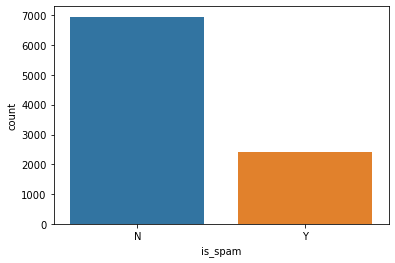

In [7]:
df_copy = df.copy()
sns.countplot(data = df_copy, x="is_spam")

As can be seen below, we have plotted the percentage of `in_reply` for Spam and Ham to see which email has more replies. If the email has reply, it is most likely Ham based on our visual analysis.

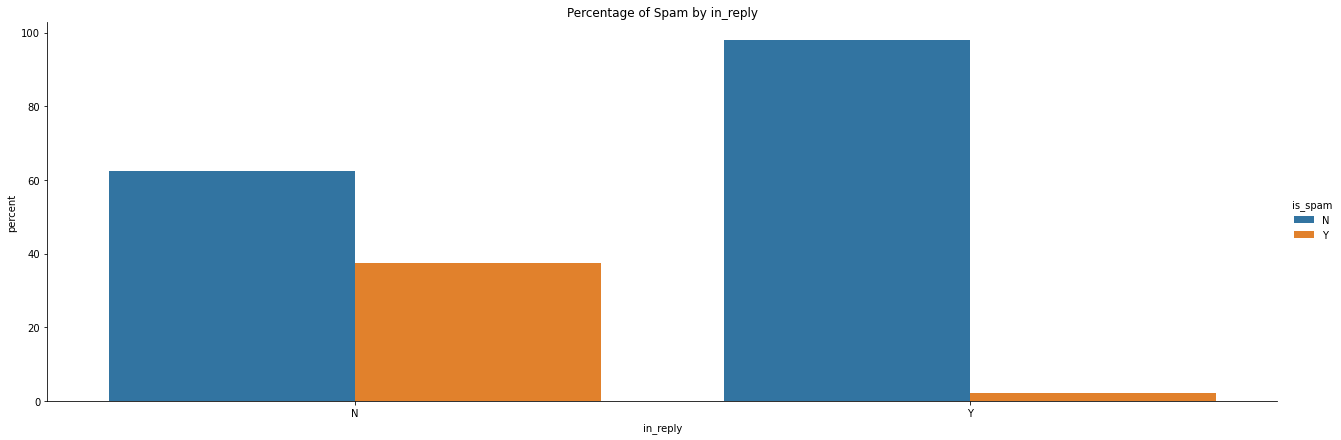

In [8]:
(df_copy
.groupby('in_reply')['is_spam']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='in_reply',y='percent',hue='is_spam', kind='bar', height=6, aspect=3))
plt.title("Percentage of Spam by in_reply") ;

We also visually analyzed on the `subj_caps` feature which check if subject of the email is with all upper cases. We found that Spam email tends to have higher percentage of subjects as capital letter

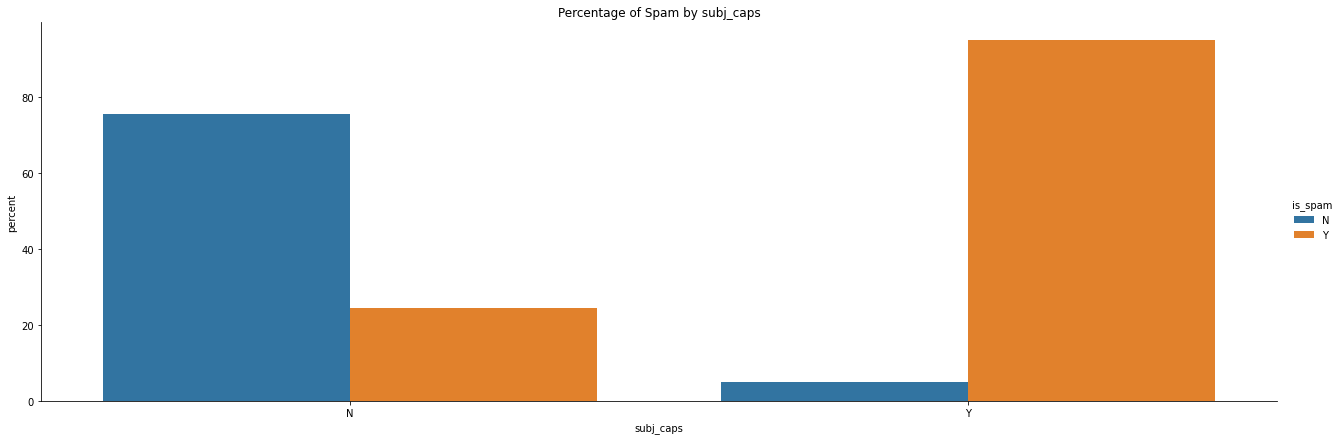

In [9]:
(df_copy
.groupby('subj_caps')['is_spam']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='subj_caps',y='percent',hue='is_spam', kind='bar', height=6, aspect=3))
plt.title("Percentage of Spam by subj_caps");

We also check if `attachments` have any visual relationship with the `is_spam`. As the below graph shows, Spam emails tends to have higher percentage of emails with attachments

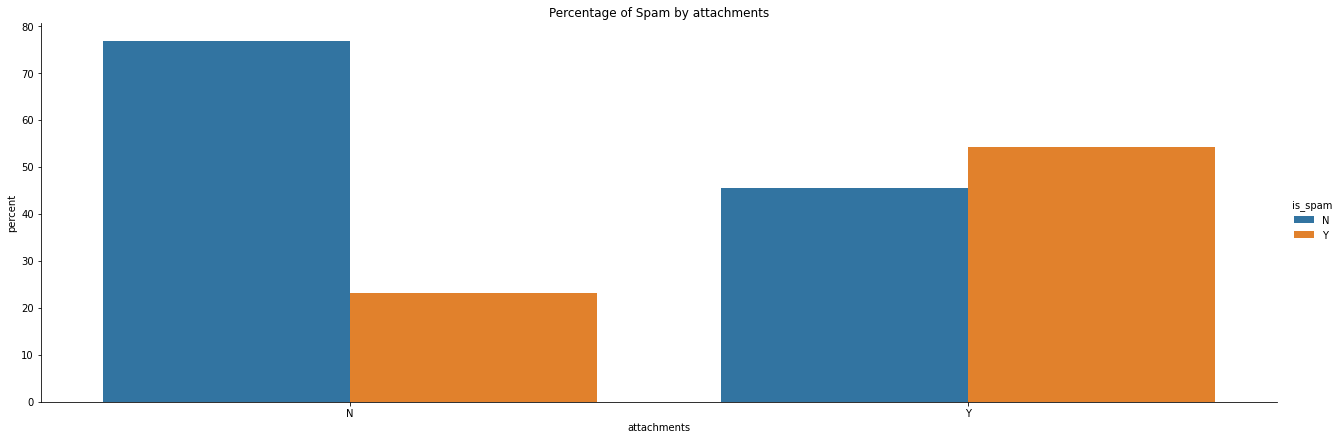

In [10]:
(df_copy
.groupby('attachments')['is_spam']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='attachments',y='percent',hue='is_spam', kind='bar', height=6, aspect=3));
plt.title("Percentage of Spam by attachments");

Finally, we ran visual analysis on the `has_html`. As can be seen below, Spam email tends to have higher percentage of html contents than the Ham email. This indicates that the Spam emails will have more number of html styles words in the email texts.

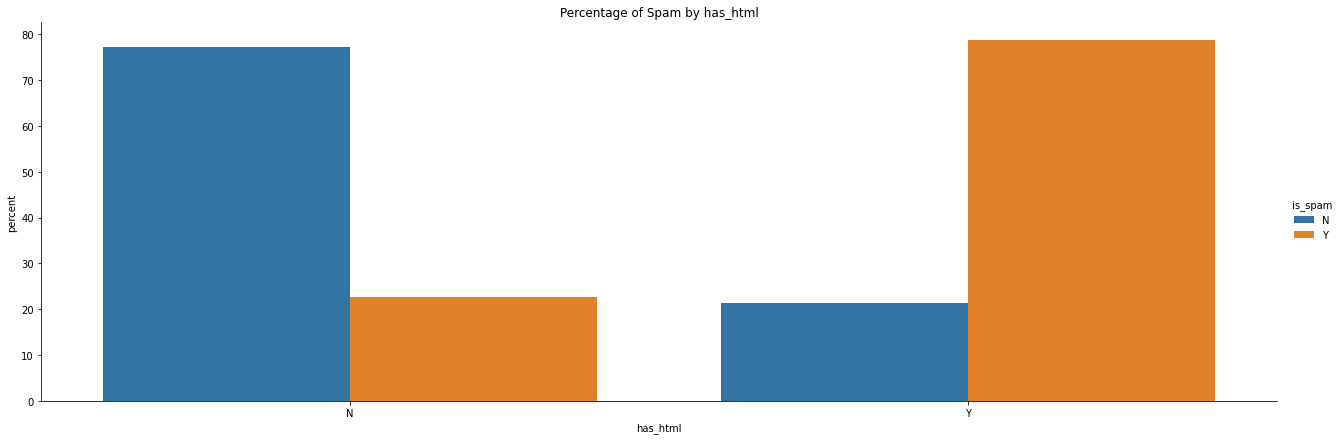

In [11]:
(df_copy
.groupby('has_html')['is_spam']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='has_html',y='percent',hue='is_spam', kind='bar', height=6, aspect=3));
plt.title("Percentage of Spam by has_html");


In [12]:
df_copy.groupby('has_html')['is_spam'].value_counts()

has_html  is_spam
N         N          6845
          Y          2006
Y         Y           391
          N           106
Name: is_spam, dtype: int64

As can be seen in the below violin and corresponding box plots, the distribution of features that were added varies between 'Spam' and 'Not Spam'. For example, the word 'Free' appears to be more right skewed, and more common in 'SPAM'. Interestingly, the text 'Subscribe' appears to be bimodal and also more frequent in 'Non-spam'. Html appears to be more common in SPAM. Body line count does appear to be positively associated with SPAM. Lastly, the words 'cialis' or 'viagra' appear to be fairly rare in our dataset. 

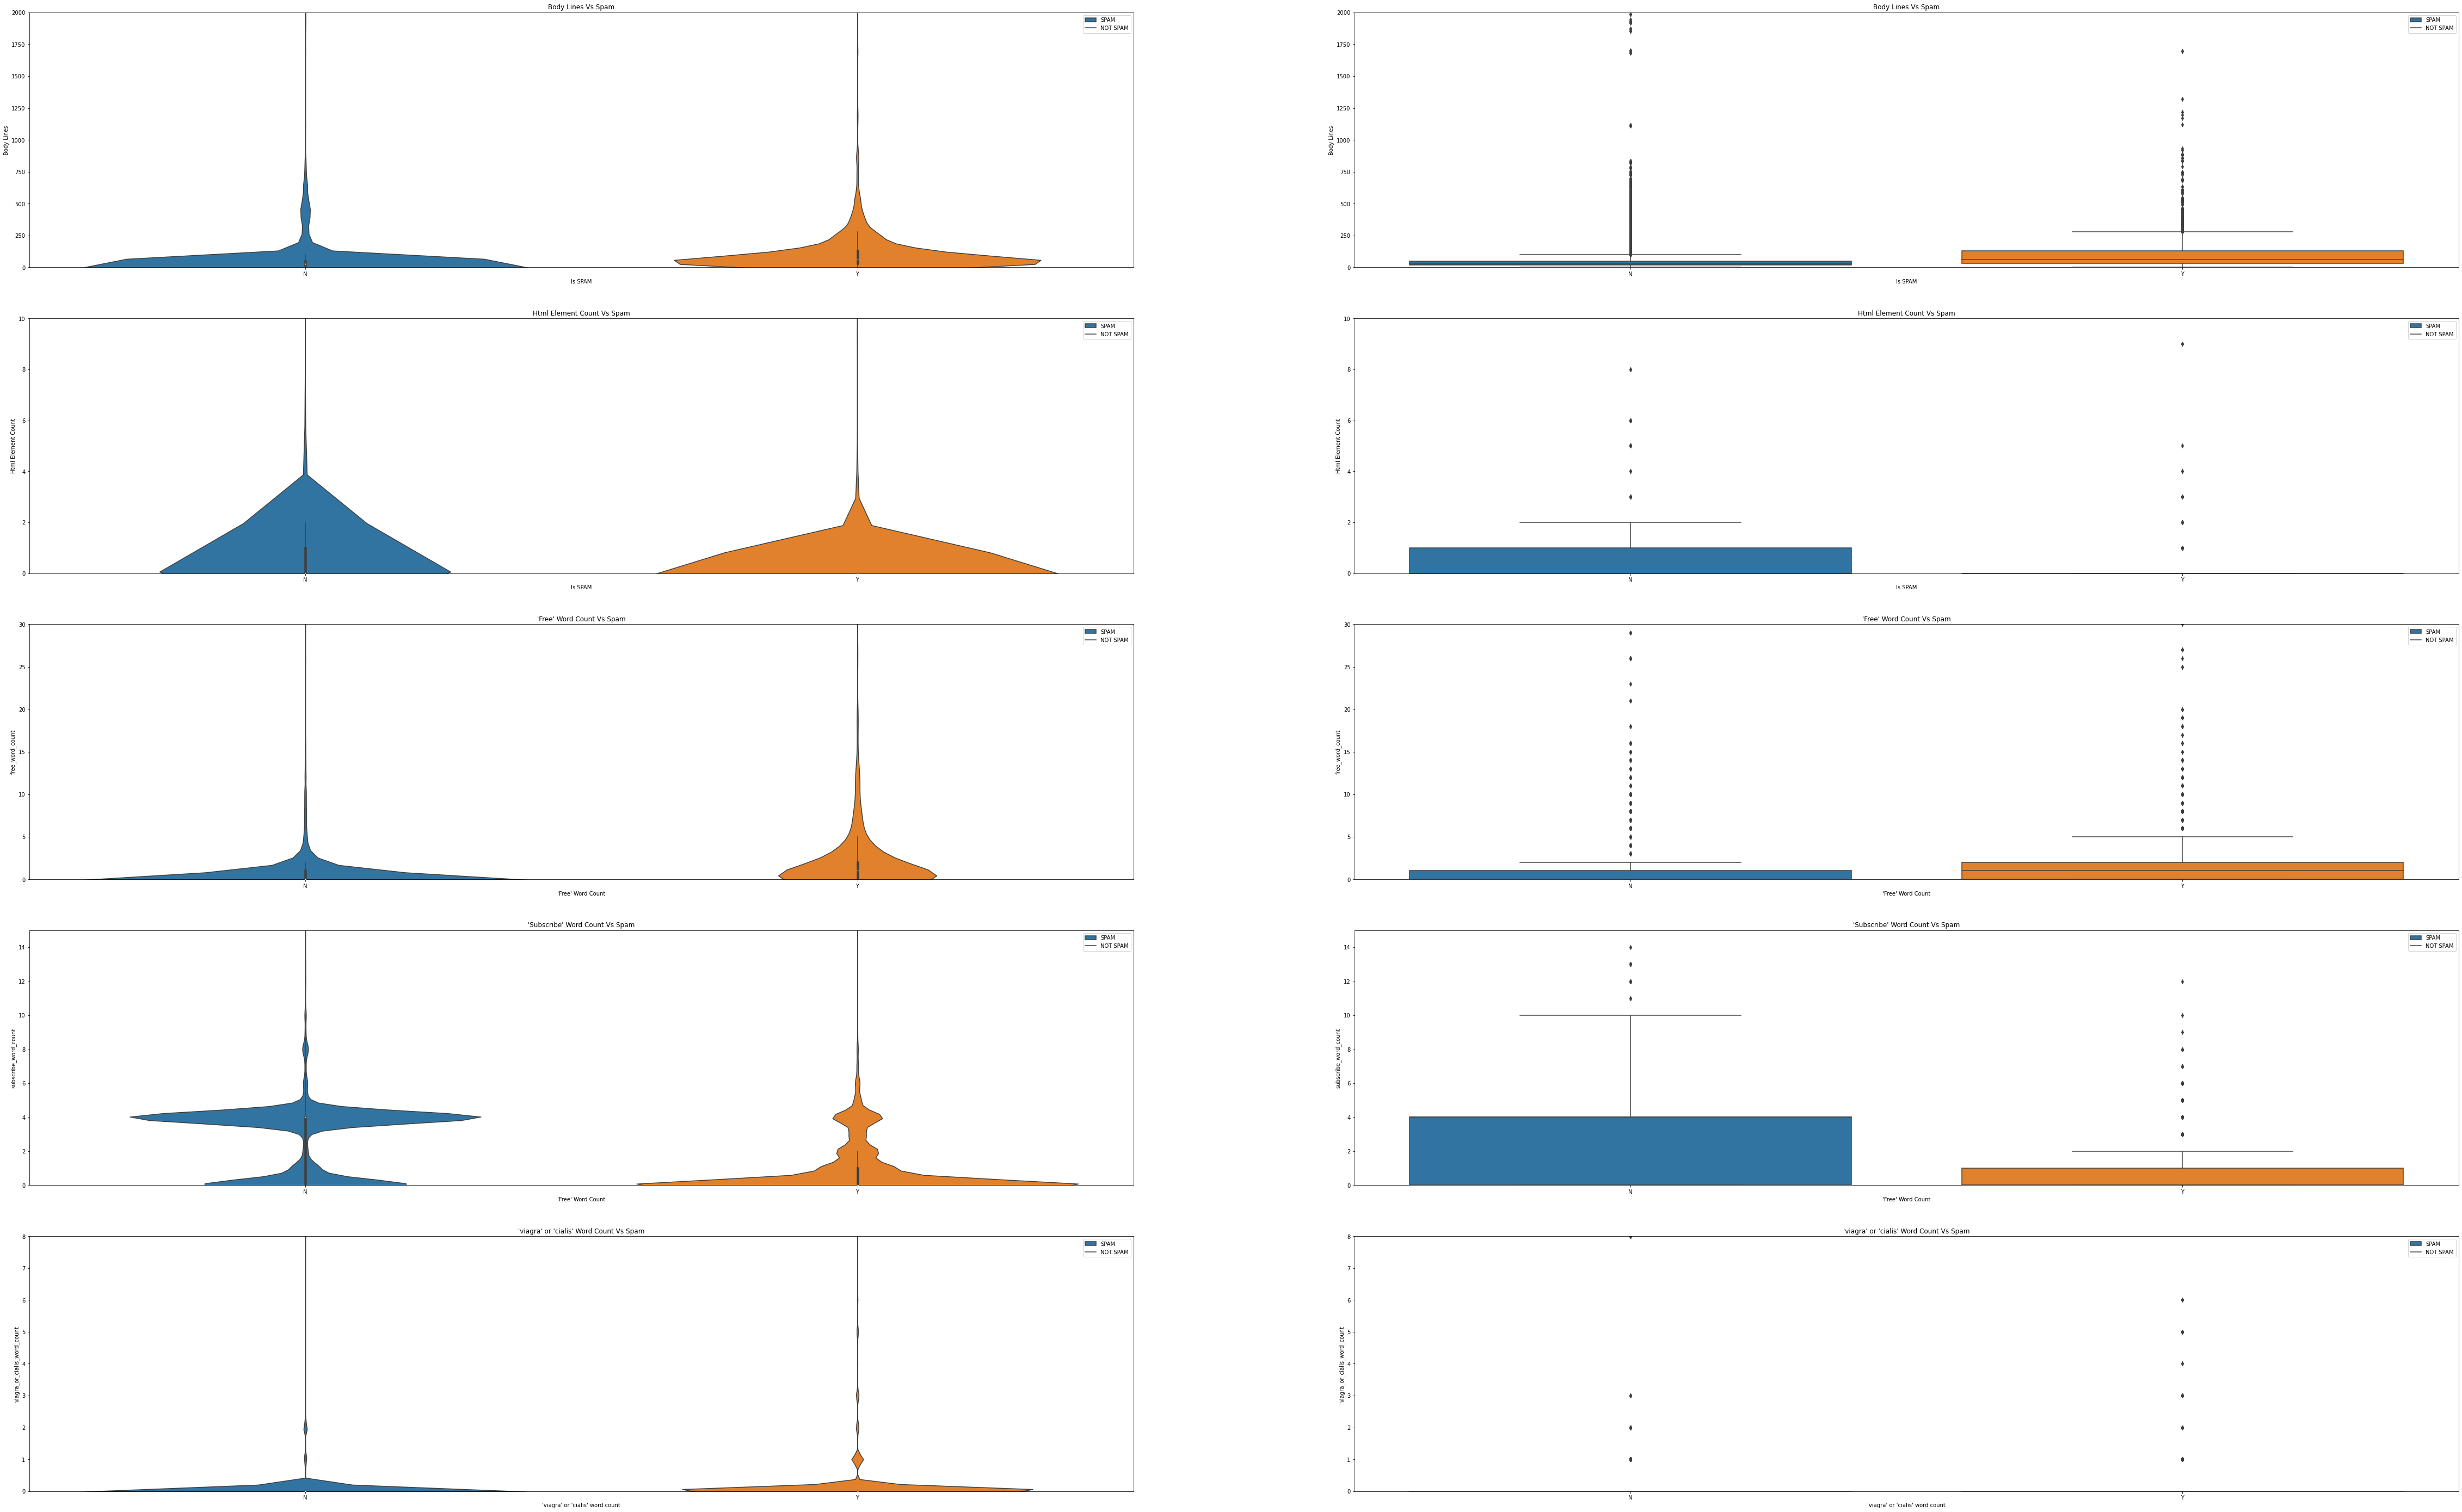

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(80,50))

ax = axs[0,0]
sns.violinplot(x='is_spam', y='body_lines', data=df_copy, ax = ax)
ax.set_title("Body Lines Vs Spam")
ax.set_xlabel("Is SPAM")
ax.set_ylabel("Body Lines")
ax.set_ylim(0, 2000);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[0,1]
sns.boxplot(x='is_spam', y='body_lines', data=df_copy, ax = ax)
ax.set_title("Body Lines Vs Spam")
ax.set_xlabel("Is SPAM")
ax.set_ylabel("Body Lines")
ax.set_ylim(0, 2000);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[1,0]
sns.violinplot(x='is_spam', y='closing_html_count', data=df_copy, ax = ax)
ax.set_title("Html Element Count Vs Spam")
ax.set_xlabel("Is SPAM")
ax.set_ylabel("Html Element Count")
ax.set_ylim(0, 10);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[1,1]
sns.boxplot(x='is_spam', y='closing_html_count', data=df_copy, ax = ax)
ax.set_title("Html Element Count Vs Spam")
ax.set_xlabel("Is SPAM")
ax.set_ylabel("Html Element Count")
ax.set_ylim(0, 10);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[2,0]
sns.violinplot(x='is_spam', y='free_word_count', data=df_copy, ax = ax)
ax.set_title("'Free' Word Count Vs Spam")
ax.set_xlabel("'Free' Word Count")
ax.set_ylim(0, 30);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[2,1]
sns.boxplot(x='is_spam', y='free_word_count', data=df_copy, ax = ax)
ax.set_title("'Free' Word Count Vs Spam")
ax.set_xlabel("'Free' Word Count")
ax.set_ylim(0, 30);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[3,0]
sns.violinplot(x='is_spam', y='subscribe_word_count', data=df_copy, ax = ax)
ax.set_title("'Subscribe' Word Count Vs Spam")
ax.set_xlabel("'Free' Word Count")
ax.set_ylim(0, 15);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[3,1]
sns.boxplot(x='is_spam', y='subscribe_word_count', data=df_copy, ax = ax)
ax.set_title("'Subscribe' Word Count Vs Spam")
ax.set_xlabel("'Free' Word Count")
ax.set_ylim(0, 15);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[4,0]
sns.violinplot(x='is_spam', y='viagra_or_cialis_word_count', data=df_copy, ax = ax)
ax.set_title("'viagra' or 'cialis' Word Count Vs Spam")
ax.set_xlabel("'viagra' or 'cialis' word count")
ax.set_ylim(0, 8);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");

ax = axs[4,1]
sns.boxplot(x='is_spam', y='viagra_or_cialis_word_count', data=df_copy, ax = ax)
ax.set_title("'viagra' or 'cialis' Word Count Vs Spam")
ax.set_xlabel("'viagra' or 'cialis' word count")
ax.set_ylim(0, 8);
ax.legend(labels=["SPAM", "NOT SPAM"], loc="upper right");


### Word Cloud Spam
To visually understand the frequencies of each email word or term, we have made the word cloud for Spam emails. As can be seen below, words associated with HTML DOM element appear more priminant. This indicates that Spam email possibly contains a high amount of html content.

In [14]:
spam_text = ' '.join(df[df['is_spam'] == 'Y']["contents"])
ham_text = ' '.join(df[df['is_spam'] == 'N']["contents"])

In [15]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white",
               max_words=350,
               width=1000,
               height=600,
               random_state=1).generate(spam_text);

plt.figure(figsize=(15,15));
plt.imshow(wc);
plt.title("Spam Word Cloud");
plt.axis("off");

ModuleNotFoundError: No module named 'wordcloud'

### Ham Word Cloud
We also made word cloud with Ham (NOT SPAM) email, to visually inspect HAM word frequencies. We can see it also has lots of html related words but less than the SPAM. Html contents are more widely distributed based on this word cloud. It also shows different words than the Spam Word cloud such as `org`, `net`, `Received`, which may indicate valid company emails and related with the business terms.

In [ ]:
wc = WordCloud(background_color="white",
               max_words=350,
               width=1000,
               height=600,
               random_state=1).generate(ham_text);

plt.figure(figsize=(15,15));
plt.imshow(wc);
plt.title("Ham Word Cloud");
plt.axis("off");

## Preprocessing

Here we first perform a test train split of 80% train, 20% test. This is done randomly so as to preserve any underlying distributions that the data may have. Rather than sampling with some strattified technique, we prefer using thresholding on our model later to account for class imbalance between spam and not spam.  

In [19]:
# test train split:
train, test = train_test_split(df, test_size=0.2)

In [17]:
# pickle test and train.
joblib.dump(train.sort_index(), "train_casestudy_03.pkl")
joblib.dump(test.sort_index(), "test_casestudy_03.pkl")

['test_casestudy_03.pkl']

In [18]:
 # Run from here as needed
train = joblib.load("train_casestudy_03.pkl").sort_index()
test = joblib.load("test_casestudy_03.pkl").sort_index()

### Doc2Vec

A common practice in document classification, document vectorization is leveraged here via a technique pioneered by google called Distributed Bag of Words. This technique trains a neural network with a single hidden layer which takes a sliding bag of words and a document Id as predictors to predict target words. In doing so, document vectors are generated. These vectors can be thought of similar to PCA components. They are latent and are intended for calculating document similarity, or in our case, to use as features to a classification model later in our analysis. 

Note: to avoid data leakage, we train our doc2vec model (Distributed Bag of Words) on training data only. vectors for test data are inferred from the model, but aren't included in training.

In [20]:
# doc2vec helper functions
def get_doc2vec_trained_model(train_df):
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_df['contents'])]
    model = Doc2Vec(documents=documents, vector_size=5, window=2, min_count=1, workers=4)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def add_doc2vec_train_vectors(train_df, model):
    embeddings = {}
    for document_index, (i, docvec) in zip(train_df.index, enumerate(model.dv)):
        i+=1
        embeddings[document_index] = docvec

        for vector_index, vec in enumerate(embeddings[document_index]):
            train_df.loc[document_index, f'doc2vec_{vector_index}'] = vec

    return train_df

def add_doc2vec_to_test_df(test_df, model, nlp_model = None):
    if not nlp_model:
        nlp_model = spacy.load("en_core_web_sm")

    nlp_documents = [nlp_model(doc) for i, doc in enumerate(test_df['contents'])]
    for document_index, nlp_document in zip(test_df.index, nlp_documents):
        print(f"documentIndex: {document_index}")
        tokens_spacy = [nlp.text.lower() for nlp in nlp_document]
        individual_vector = model.infer_vector(tokens_spacy)
        for vector_index, vec in enumerate(individual_vector):
            test_df.loc[document_index, f'doc2vec_{vector_index}'] = vec

    return test_df

In [23]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train['contents'])]


In [27]:
documents

[TaggedDocument(words='From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002\nReturn-Path: <exmh-workers-admin@spamassassin.taint.org>\nDelivered-To: zzzz@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36\n\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)\nReceived: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for\n    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100\nReceived: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by\n    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002\n    07:35:02 -0400 (EDT)\nDelivered-To: exmh-workers@listman.spamassa

In [25]:
model = Doc2Vec(documents=documents, vector_size=5, window=2, min_count=1, workers=4)


In [ ]:
model.build_vocab(documents)


In [21]:
# train the nlp doc2vec model
train = train.sort_index()
doc2vec_model = get_doc2vec_trained_model(train)
train_with_vectors = add_doc2vec_train_vectors(train, doc2vec_model)
train_with_vectors.head()

filename is_spam in_reply subj_caps  \
0  00001.7c53336b37003a9286aba55d2945844c       N        Y         N   
1  00002.9c4069e25e1ef370c078db7ee85ff9ac       N        N         N   
2  00003.860e3c3cee1b42ead714c5c874fe25f7       N        N         N   
3  00004.864220c5b6930b209cc287c361c99af1       N        N         N   
4  00005.bf27cdeaf0b8c4647ecd61b1d09da613       N        Y         N   

  attachments has_html  body_lines  closing_html_count  \
0           N        N          50                   1   
1           N        N          26                   0   
2           N        N          38                   0   
3           N        N          32                   1   
4           N        N          31                   0   

                                            contents  free_word_count  \
0  From exmh-workers-admin@redhat.com  Thu Aug 22...                0   
1  From Steve_Burt@cursor-system.com  Thu Aug 22 ...                1   
2  From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...                1   
3  From irregulars-admin@tb.tf  Thu Aug 22 14:23:...                0   
4  From Stewart.Smith@ee.ed.ac.uk  Thu Aug 22 14:...                1   

   subscribe_word_count  viagra_or_cialis_word_count  doc2vec_0  doc2vec_1  \
0                     4                            0   0.731593   0.183550   
1                     4                            0   0.888905   0.178792   
2                     4                            0   0.718871   0.411752   
3                     4                            0   0.176874   0.330772   
4                     4                            0   0.831503   0.186159   

   doc2vec_2  doc2vec_3  doc2vec_4  
0   0.167687   0.308598  -2.961981  
1   0.106660   0.278067  -2.494149  
2   0.135091   0.249060  -2.270101  
3  -0.459711  -0.056330  -1.701984  
4   0.093174   0.357876  -2.603409

In [22]:
# infer vectors for test data for doc2vec
test_copy = test.sort_index()
test_with_vectors = add_doc2vec_to_test_df(test_copy, doc2vec_model)
test_with_vectors.head()

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# pickle test and train.
joblib.dump(train_with_vectors, "train_with_vectors_casestudy_03.pkl")
joblib.dump(test_with_vectors, "test_with_vectors_casestudy_03.pkl")

In [ ]:
 # Run from here as needed
train_with_vectors = joblib.load("train_with_vectors_casestudy_03.pkl")
test_with_vectors = joblib.load("test_with_vectors_casestudy_03.pkl")

For the boolean data, we converted into 0 and 1 to build model effectively

In [ ]:
train_with_vectors.replace({'N': 0, 'Y': 1}, inplace=True)
test_with_vectors.replace({'N': 0, 'Y': 1}, inplace=True)

We dropped `contents` as we already converted and generated doc2vec vectors from the contents. `filename` is also dropped as this feature is not used for  prediction.

In [ ]:
# create X and Y from test and train
X_train = train_with_vectors.drop(['is_spam', 'contents', 'filename'], axis=1)
y_train = train_with_vectors['is_spam']
X_test = test_with_vectors.drop(['is_spam', 'contents', 'filename'], axis=1)
y_test = test_with_vectors['is_spam']

Here we initialize a column transformer for scaling (used in pipelines further below). This scaler performs a min-max scaling on all numeric columns and passes through all one hot encoded categorical features. This min max scaling is performed to ensure that all values are positive which is a requirement of Naive Bayes models. Scaling here also ensures that equal weight will be placed on each feature when this data is used for clustering or for classification. 

In [ ]:
# scaling transformer
cat_cols = ['in_reply', 'subj_caps', 'attachments', 'has_html']
numeric_columns = [column for column in X_train.columns if column not in cat_cols]
t_slr = [('scale', MinMaxScaler(), numeric_columns)]
col_transform = ColumnTransformer(t_slr, remainder='passthrough')

## Model Building & Evaluation



### Clustering


In [ ]:
X_train_scaled_for_clustering = col_transform.fit_transform(X_train)

#### PCA
PCA is used to compress all of our features into a visualizable space with minimal information loss. This way cluster analysis can be done in a feature space where the features are mostly independent and also in a reduced feature set which captures most of the variance of the original, much larger feature set.

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X_train_scaled_for_clustering)
pca_data = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pca_data['is_spam'] = y_train
spam_indices = pca_data['is_spam'] == 1

#### DBSCAN
We first cluster with a DBSCAN statistical technique. By doing so, we are able to find *11* clusters. There are two major regions where clusters formed of which *7* of clusters locate on left side and *4* of the clusters locate on right side. Further tuning could be performed on the density value that dbscan uses, to help identify only 2 clusters. That said, to furthur anlayze the clusters, we made two different clustering plots for each Spam and Not Spam emails. Comparing two plots, there are differences on the right side that when it is Spam there are less clusters formed on the right side. This might indicate that the clusters on the right side are more likely to be Ham email.

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
preds_dbscan = dbscan.fit_predict(X_train_scaled_for_clustering)
preds_dbscan += 1
pca_data['preds_dbscan'] = preds_dbscan

In [ ]:
pca_data_spam = pca_data[spam_indices]
pca_data_not_spam = pca_data[~spam_indices]
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(25,15))
sns.scatterplot(x="pca1", y="pca2", hue='preds_dbscan', data=pca_data_not_spam, palette='colorblind', ax=axs[0])
axs[0].set_title('DBSCAN Clustering with 2 dimensions - NOT SPAM') ;

sns.scatterplot(x="pca1", y="pca2", hue='preds_dbscan', data=pca_data_spam, palette='colorblind', ax=axs[1])
axs[1].set_title('DBSCAN Clustering with 2 dimensions - SPAM') ;

### DBSCAN Cluster Assignments by Percentage
To furthur analyze the clusters in depth, we made a bar plot with normalized percentages for each cluster assignment. As can be seen below, we are able to identify clear differences on certain clutsters. `Cluster 1` has a roughly evely mixed distribution for both Spam and Not Spam, which indicates that the emails in `Cluster 1` have difficulties on identifying whether it is Spam and Not Spam. `Cluster 2` is highly distributed on Not Spam and `Cluster 6 and 8` are highly distributed on Spam. This indicates that features on `Cluster 2` are mostly related with SPAM emails and features on `Cluster 6 and 8` are also related to Spam. If we are able to identify which emails are clusterd in those clusters from PCA, we can able to extract additional features that might be helpful. This can be the future research we can take to create new features from these clusters.

In [ ]:
plot_data_dbscan_not_spam = pca_data_not_spam.value_counts(normalize=True).mul(100).groupby('preds_dbscan').sum()
plot_data_dbscan_spam = pca_data_spam.value_counts(normalize=True).mul(100).groupby('preds_dbscan').sum()

plot_data_dbscan_not_spam_df = pd.DataFrame(data =plot_data_dbscan_not_spam, index= plot_data_dbscan_not_spam.index, columns=['percent'])
plot_data_dbscan_spam_df = pd.DataFrame(data = plot_data_dbscan_spam, index= plot_data_dbscan_spam.index, columns=['percent'])

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
sns.barplot(x=plot_data_dbscan_not_spam_df.index, y='percent', data=plot_data_dbscan_not_spam_df, palette='colorblind', ax=axs[0])
axs[0].set_title('DBSCAN Cluster Assignments  - NOT SPAM') ;
axs[0].set_xlabel("DBSCAN Cluster Assignement")

sns.barplot(x=plot_data_dbscan_spam_df.index, y='percent', data=plot_data_dbscan_spam_df, palette='colorblind', ax=axs[1])
axs[1].set_title('DBSCAN Clustering Assignments - SPAM') ;
axs[1].set_xlabel("DBSCAN Cluster Assignement")

##### KMeans Clustering
We also build the clustering with KMeans model and we get very similar clusters regions with the result of DBSCAN.

In [ ]:
kmeans = KMeans(n_clusters=5, tol=0.0001, max_iter=300)
preds_kmeans = kmeans.fit_predict(X_train_scaled_for_clustering)
preds_kmeans += 1
pca_data['preds_kmeans'] = preds_kmeans

### KMeans Cluster Assignments by Percentage
Below plots are the bar plot of percentage of cluster assignments with KMeans model. It got the similar result with the DBSCAN model. `Cluster 2` have mixed distribution on both Spam and Not Spam. `Cluster 3 and 5` are mostly distributed on Not Spam. `Cluster 1 and 4` are slightly more distributed on Spam emails. From this cluster assignments distribution we can make an assumption that hard_ham data might be related with `Cluster 2` as it is evenly distributed for both Spam and Ham.

In [ ]:
pca_data_spam = pca_data[spam_indices]
pca_data_not_spam = pca_data[~spam_indices]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(25,15))
sns.scatterplot(x="pca1", y="pca2", hue='preds_kmeans', data=pca_data_not_spam, palette='colorblind', ax=axs[0])
axs[0].set_title('KMeans Clustering with PCA and 5 clusters - NOT SPAM');

sns.scatterplot(x="pca1", y="pca2", hue='preds_kmeans', data=pca_data_spam, palette='colorblind', ax=axs[1])
axs[1].set_title('KMeans Clustering with PCA and 5 clusters - SPAM');

In [ ]:
plot_data_kmeans_not_spam = pca_data_not_spam.value_counts(normalize=True).mul(100).groupby('preds_kmeans').sum()
plot_data_kmeans_spam = pca_data_spam.value_counts(normalize=True).mul(100).groupby('preds_kmeans').sum()

plot_data_kmeans_not_spam_df = pd.DataFrame(data =plot_data_kmeans_not_spam, index= plot_data_kmeans_not_spam.index, columns=['percent'])
plot_data_kmeans_spam_df = pd.DataFrame(data = plot_data_kmeans_spam, index= plot_data_kmeans_spam.index, columns=['percent'])

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
sns.barplot(x=plot_data_kmeans_not_spam_df.index, y='percent', data=plot_data_kmeans_not_spam_df, palette='colorblind', ax=axs[0])
axs[0].set_title('KMeans Cluster Assignments  - NOT SPAM') ;
axs[0].set_xlabel("KMeans Cluster Assignement")

sns.barplot(x=plot_data_kmeans_spam_df.index, y='percent', data=plot_data_kmeans_spam_df, palette='colorblind', ax=axs[1])
axs[1].set_title('KMeans Clustering Assignments - SPAM') ;
axs[1].set_xlabel("KMeans Cluster Assignement")

###  Naive Bayes Model

Here we create a Randomized Grid Search CV with 10 fold cross validation to train a Multinomial Naive Bayes classification model. This grid search pipeline was narrowed to optiize the peanalization alpha blending hyperparameter and to perform scaling prior to model fitting and transformation. 

ROC_AUC is chosen as our scoring metric, again, because this simultaneously maximizes a balance of true positives and true negatives and as such lends the model to post training thresholding to achieve optimal precision and recall values. As we care about both precision and recall, but slightly favor precision, this is important. 


Note: As Naive Bayes do not take negative values as the input, it is required to make the input to be positive data. For this reason, we decided to use MinMaxScaler to put our data to be fit between 0 and 1.

In [ ]:
search_space = {
    'model__alpha': [17.5, 18, 18.5]
}

model = MultinomialNB()
nb_pipe = Pipeline(steps=[('preprocessing',col_transform),
                          ('model', model)])

nb_search = GridSearchCV(nb_pipe, search_space, cv=10, scoring='roc_auc', refit=True)
nb_search = nb_search.fit(X_train, y_train)

In [ ]:
nb_search.best_estimator_

In [ ]:
cross_val_score(nb_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean()

In [ ]:
y_pred = nb_search.best_estimator_.predict(X_test)

In [ ]:
naive_accuracy = 6951/(2397 + 6951)
print (f"naive accuracy, was: {naive_accuracy}")

In [ ]:
test_accuracy = accuracy_score(y_pred, y_test)
test_accuracy

In [ ]:
metrics.plot_roc_curve(nb_search.best_estimator_, X_train, y_train)

In [ ]:
metrics.plot_roc_curve(nb_search.best_estimator_, X_test, y_test)

#### Recall vs Percision
Without any thresholding, we got a recall of 0.367 and precision of 0.8277 which indicates it has a relatively small number of False Positives. When there is a high False Positive, this indicates it is more likely to predict Not Spam emails as Spam email. We do not want to put the possible important email into Spam box and miss the important emails. The confusion matrix we got shows promising results. We can try tuning the threshold to see if we can get the better result.

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

In [ ]:
y_pred_proba = nb_search.best_estimator_.predict_proba(X_test)
nb_result_df = pd.DataFrame(columns=['y_test', 'y_pred', 'y_proba_0', 'y_proba_1'])

nb_result_df['y_test'] = y_test
nb_result_df['y_pred'] = y_pred
nb_result_df['y_proba_0'] = y_pred_proba[:,0]
nb_result_df['y_proba_1'] = y_pred_proba[:,1]

#### Tuning Threshold - Precision and Recall
From the Precision vs Recal plot, we are able to find that when the threshold is around `0.26` to `0.27` recall and precision meet. Since prefer a higher precision but also don't want to ignore recall, we choose a threshold which is slightly higher than the precision/recall intersection. 

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1]) 
plt.title("Test Precision-Recall vs Test Threshold Chart");
plt.plot(thresholds, precision[: -1], "b--", label="Precision");
plt.plot(thresholds, recall[: -1], "r--", label="Recall");
plt.ylabel("Precision, Recall");
plt.xlabel("Threshold");
plt.legend(loc="upper right");
plt.ylim([.3,.9]);
plt.xlim([0.23,.4]);

##### Precision and Recall after tuning Threshold
Our Multinomial Bayes Model's accuracy is not actually that much better than a model which predicts ALL emails to be HAM (NOT SPAM). Such a naive model's accuracy is `74.36%` where as our model's accuracy is `81.93%`. However, we should not that the recall of a naive model is `0.00%` where as the recall of our tuned model is `41.3%`. This indicates that, for our model (and NOT the naive model) around `~40%` of actual spam will be filtered out of an inbox. However, with a precision of `78.9%`, rougly `21.1%` of all valid emails will be incorrectly labeled as SPAM. A Future goal would be to improve this precision score. 


After tuning the treshold with .29 we get the precision with 41.3% and recall with `78.9%`. Since the data is imbalanced it is more likely to have the higher precision which means to have less False Positive. Thus, even though we want a slightly higher precision for our metrics, we also want to balance recall and precision.

In [ ]:
nb_result_df.loc[nb_result_df[nb_result_df['y_proba_1'] > 0.29]['y_proba_1'].index, 'y_pred'] = 1
nb_result_df.loc[nb_result_df[nb_result_df['y_proba_1'] <= 0.29]['y_proba_1'].index, 'y_pred'] = 0

print(f'Recall with threshold 0.29 is {recall_score(y_test, nb_result_df.y_pred)}')
print(f'Precision with threshold 0.29 is {precision_score(y_test, nb_result_df.y_pred)}')

confusion_matrix(y_test, nb_result_df.y_pred,  labels=[1,0])

## Conclusion

With a constant flow of spam emails being sent, companies face a need to automate the spam detection process. Using a tuned Naive Bayes model and custom feature engineering, we were able to take unstructured email data and predict spam with an accuracy of `0.81` a precision of `78.9%` and recall of `41.3%`. Our predictive model is both fast to train, and can detect SPAM emails at least 40% of the time, while ensuring that only a small number of valid emails are incorrectly classified as spam. To do this we extracted simple features like html counts, and more complex features like document vectors using google's distributed bag of words model. 

While these results are decent, future goals for this reasearch would be to expanding on nature language processing models, especially with feature engineering to achieve even better spam detection and even better precision. While the precision and recall tradeoff is impossible to avoid entirely, there is clearly more to the email data, as evidenced by cluster analysis. Accounting for new features, email document similarity, and even lexical knowledge bases which focus on SPAM detection as a domain, would all further the ability of the model outlined in this analysis. 